# COM2004/3004 Assignment 2: Code Snippets

v1.0 30/10/2016

This notebook contains some Python code snippets that you may find useful when working on COM2004/COM3004 assignment 2.


## 1. Loading the data

The cell below shows you how to load the data from the pickle file.

In [1]:
import pickle
data = pickle.load(open("assignment2.pkl", "rb"))
train_data = data['train_data']
train_labels = data['train_labels']
test1 = data['test1']
test2 = data['test2']
words  = data['words']

## 2. Displaying a character

The cell below displays a sample of the character data as an image.

5


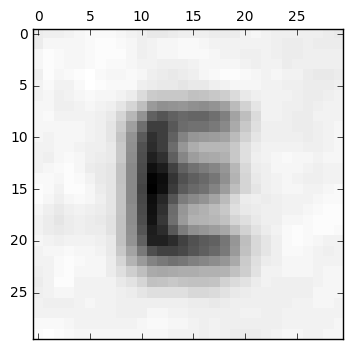

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

n = 1 # Select the 18th sample
pixels = train_data[n, :]
plt.matshow(np.reshape(pixels, (30, 30), order='F'), cmap=cm.gray)

print(train_labels[n])

## 3. The $k$-Nearest Neighbour Classifier

The cell below contains the $k$-NN classifier function that is being used in the lab classes.

In [3]:
def classify(train, train_labels, test):
    """Nearest neighbour classification

    train - matrix of training data (one sample per row)
    train_labels - corresponding training data labels
    test - matrix of samples to classify

    returns: labels - vector of test data labels
    """
    x = np.dot(test, train.transpose())
    modtest = np.sqrt(np.sum(test*test, axis=1))
    modtrain = np.sqrt(np.sum(train*train, axis=1))
    dist = x / np.outer(modtest, modtrain.transpose())  # cosine distance
    nearest = np.argmax(dist, axis=1)
    labels = train_labels[nearest]
    return labels


# 4. Using the classifier

The code below shows an example of using the classifier. 

(For demonstration purposes the training data has been cut into smaller training and test sets. In the assignment you will use all the training data for training and will be testing on test samples extracted from the images.)

In [4]:
import numpy as np

# Use first 599 samples of train_data for training
train1_data = train_data[0:599, :]
train1_labels = train_labels[0:599]

# Use last 100 samples of train_data for testing
test1_data = train_data[599:, :]
test1_labels = train_labels[599:]

# Count how many samples in the test set
n_test = test1_labels.shape[0]

# Classify the test set to get an array of guessed labels
test1_guessed = classify(train1_data, train1_labels, test1_data)

# Compare guesses against true labels and compute percent correct
pcor = np.sum(test1_guessed == test1_labels) * 100.0 / n_test

print(pcor)  # This should give 92% correct

92.0


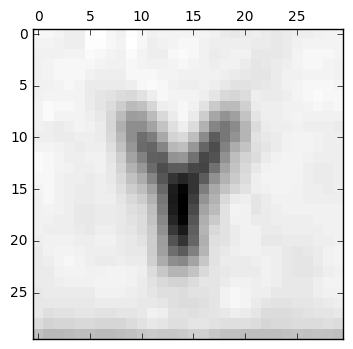

In [84]:
plt.matshow(np.reshape(test1_data[1], (30, 30), order='F'), cmap=cm.gray)

# Step 1: Preprocessing

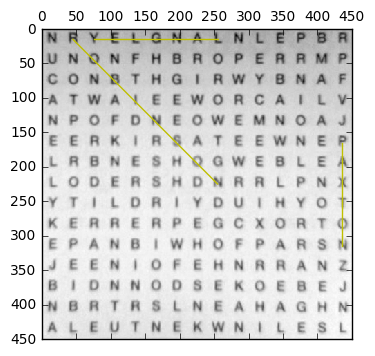

In [22]:
#Note: move the function to Display the result.
import types
GRID_LENGTH=15

def draw_line(graph, start, end, side_length):
    """This draws a line on a pyplot between two letters.
       graph: the pyplot to draw on
       start_letter: where the line begins, can be a coordinate or index.
       end_letter: where the line ends, can be a coordinate or index."""
    
    if (isinstance(start, int)):
        draw_line(graph, [start % GRID_LENGTH,start//GRID_LENGTH], [end % GRID_LENGTH,end//GRID_LENGTH], side_length)
    else:
        # get starting x-coordinate, get ending x-coordinate.
        xSxE=[start[0]*side_length+GRID_LENGTH,end[0]*side_length+GRID_LENGTH]
        # get starting y-coordinate, get ending y-coordinate.
        ySyE=[start[1]*side_length+GRID_LENGTH,end[1]*side_length+GRID_LENGTH]
        # Plot a yellow line on the graph
        plt.xlim(0, GRID_LENGTH*side_length)
        plt.ylim(GRID_LENGTH*side_length, 0)
        graph.plot(xSxE, ySyE, 'y-')

# Draw_line example, using coordinates.
plt.matshow(test1, cmap=cm.gray)
draw_line(plt, [2,0], [8,0], 30)
draw_line(plt, [1,0], [8,7], 30)
draw_line(plt, [14,5], [14,10], 30)

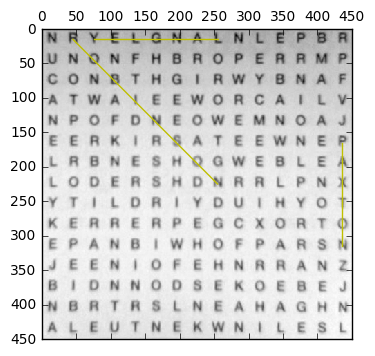

In [24]:
# Draw_line example, using indices going from left to right, top to bottom.
plt.matshow(test1, cmap=cm.gray)
draw_line(plt, 2, 8, 30)
draw_line(plt, 1, 113, 30)
draw_line(plt, 89, 164, 30)

Matrix of Features
(225, 900)
[ 159.  159.  158.  157.  157.  157.  158.  159.  159.  159.  158.  158.
  158.  158.  158.  158.  158.  158.  156.  155.  157.  156.  156.  157.
  159.  160.  160.  158.  157.  155.  159.  159.  158.  158.  157.  156.
  157.  158.  159.  160.  160.  158.  159.  159.  158.  159.  159.  159.
  158.  156.  157.  156.  156.  156.  158.  159.  160.  158.  156.  157.
  160.  160.  159.  158.  157.  156.  156.  156.  157.  159.  160.  160.
  160.  158.  158.  158.  159.  160.  159.  158.  157.  157.  157.  157.
  158.  158.  158.  157.  156.  157.  160.  161.  159.  157.  157.  157.
  157.  157.  157.  157.  159.  161.  160.  158.  157.  157.  157.  158.
  158.  157.  155.  157.  158.  159.  158.  157.  157.  157.  157.  157.
  160.  161.  160.  157.  157.  158.  159.  159.  158.  158.  158.  159.
  159.  159.  159.  158.  157.  156.  154.  152.  153.  156.  159.  160.
  158.  157.  157.  158.  159.  157.  160.  161.  160.  157.  157.  159.
  161.  161.  160.  1

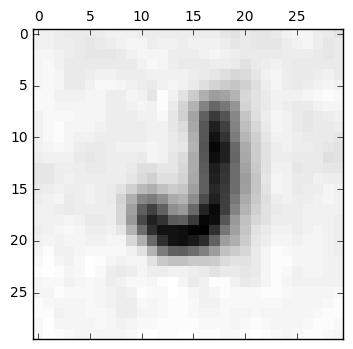

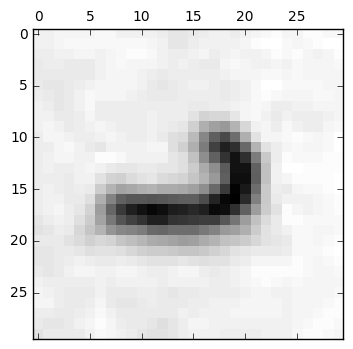

In [92]:
# Note: Make sure it returns arrays in such a way that 'F' is used to reshape not 'C'.
def get_characters(ndimarray, as_vectors):
    """This allows the extraction of individual character images as 30 by 30 matrices
    ndimarray: the matrix of pixels for every character
    as_vectors: if this is true, a 225 by 900-element matrix is returned."""
    letters = []
    cols = (ndimarray.shape[1])
    rows = (ndimarray.shape[0])
    col_step = cols//GRID_LENGTH
    row_step = rows//GRID_LENGTH
    for current_row_start in range(0, rows, row_step):
        for slice_start in range(0,cols,col_step):
            letter = []
            for i in range(current_row_start,current_row_start+row_step):
                row_of_single_letter = ndimarray[i][slice_start:slice_start+col_step]
                if as_vectors :
                    letter = np.append(letter,row_of_single_letter)
                else:
                    letter = letter + [row_of_single_letter]
            letters = letters + [letter]
    return np.array(letters)

# Examples
letter_index=74

# 225 letters, each as a vector of 900 features
print("Matrix of Features")
print(get_characters(test1, True).shape)
print(get_characters(test1, True)[letter_index])

#Check that for a given letter, its the vector of features (after conversion to a list) is identical to its 30 by 30 matrix (after being flattened into a single list using a list comprehension).
print("They are " + ("" if np.ndarray.tolist(get_characters(test1, True)[letter_index])==[item for sublist in get_characters(test1, False)[letter_index] for item in sublist] else "not ") + "identical.")

# 225 letters, each as 30 by 30 matrices that can be plotted
print("Plottable letters")
print(get_characters(test1, False).shape)
plt.matshow(get_characters(test1, False)[letter_index], cmap=cm.gray)
plt.matshow(np.reshape(get_characters(test1, True)[letter_index], (30, 30), order='F'), cmap=cm.gray)

# Step 2: Classification

In [8]:
classified_mat = classify(train_data, train_labels, get_characters(test1, True))
# Reshaping into 15 by 15 matrix
# as number labels:
print(np.reshape(classified_mat,(GRID_LENGTH,GRID_LENGTH), order='C'))
# as letters:
print(np.reshape(np.array([chr(64+n) for n in classified_mat]), (GRID_LENGTH,GRID_LENGTH), order='C'))

[[14 11  8 13  8 15 19 11  8 14  8 13 13 23 11]
 [15 14 15 14 13 20 13 11 15 13 13 11 13  2 13]
 [15 15 14 13  8 19  7  1 11  2  8 23 14 11 13]
 [11  8  2 11  1 13 13  2 15 13 15 11  8  8 14]
 [19 13 15 16 15 19 13 15  2 13  2 19 15 11 10]
 [ 8  8 19 11  1 19 13 11  8 13 13  2 19 13 13]
 [ 8  5  2 19  8 13 19 15 15  2 13 13  8 13 11]
 [ 8 15 15  8 19 13  5 15 19 19 19  8 16 19  8]
 [ 1  1  1  8 15 19  1  8 15 19  1 19  8 15  8]
 [11  8 19 19  8 19 16  8 15 15  8 15 19  8 15]
 [ 8 16 11 19  2  1  2 19 15 16  5 11 19 14 19]
 [10  8  8 19  1 15 16  8 19 19 19 19  1 19  8]
 [ 2  1 15 19 19 15 15 13  8 11 15  8 23  8 10]
 [19  2 19  8 19 13  8 19  8 11 19  1 15 19 19]
 [11  8  8 19  8 19  8 11  2 19  1  8  8 13  8]]
[['N' 'K' 'H' 'M' 'H' 'O' 'S' 'K' 'H' 'N' 'H' 'M' 'M' 'W' 'K']
 ['O' 'N' 'O' 'N' 'M' 'T' 'M' 'K' 'O' 'M' 'M' 'K' 'M' 'B' 'M']
 ['O' 'O' 'N' 'M' 'H' 'S' 'G' 'A' 'K' 'B' 'H' 'W' 'N' 'K' 'M']
 ['K' 'H' 'B' 'K' 'A' 'M' 'M' 'B' 'O' 'M' 'O' 'K' 'H' 'H' 'N']
 ['S' 'M' 'O' 'P' 'O' 'S' '

In [25]:
# These are the actual labels for the letters.
test_labels = np.array([14,18,25, 5,12, 7,14, 1,12,14,12, 5,16, 2,18,
                        21,14,15,14, 6, 8, 2,18,15,16, 5,18,18,13,16,
                         3,15,14, 2,20, 8, 7, 9,18,23,25, 2,14, 1, 6,
                         1,20,23, 1, 9, 5, 5,23,15,18, 3, 1, 9,12,22,
                        14,16,15, 6, 4,14, 5,15,23, 5,13,14,15, 1,10,
                         5, 5,18,11, 9,18,19, 1,20, 5,5 ,23,14, 5,16,
                        12,18, 2,14, 5,19, 8,15, 7,23, 5, 2,12, 5, 1,
                        12,15, 4, 5,18,19, 8, 4,14,18,18,12,16,14,24,
                        25,20, 9,12, 4,18, 9,25, 4,21, 9, 8,25,15,20,
                        11, 5,18,18, 5,18,16, 5, 7, 3,24,15,18,20,15,
                         5,16, 1,14, 2, 9,23, 8,15, 6,16, 1,18,19,14,
                        10, 5, 5,14, 9,15, 6, 5, 8,14,18,18, 1,14,26,
                         2, 9, 4,14,14,15, 4,19, 5,11,15, 5, 2, 5,10,
                        14, 2,18,20,18,19,12,14, 5, 1, 8, 1, 7, 8,14,
                         1,12, 5,21,20,14, 5,11,23,14, 9,12, 5,19,12])
print(np.reshape(test_labels,(GRID_LENGTH,GRID_LENGTH), order='C'))
print(np.reshape(np.array([chr(64+n) for n in test_labels]), (GRID_LENGTH,GRID_LENGTH), order='C'))

[[14 18 25  5 12  7 14  1 12 14 12  5 16  2 18]
 [21 14 15 14  6  8  2 18 15 16  5 18 18 13 16]
 [ 3 15 14  2 20  8  7  9 18 23 25  2 14  1  6]
 [ 1 20 23  1  9  5  5 23 15 18  3  1  9 12 22]
 [14 16 15  6  4 14  5 15 23  5 13 14 15  1 10]
 [ 5  5 18 11  9 18 19  1 20  5  5 23 14  5 16]
 [12 18  2 14  5 19  8 15  7 23  5  2 12  5  1]
 [12 15  4  5 18 19  8  4 14 18 18 12 16 14 24]
 [25 20  9 12  4 18  9 25  4 21  9  8 25 15 20]
 [11  5 18 18  5 18 16  5  7  3 24 15 18 20 15]
 [ 5 16  1 14  2  9 23  8 15  6 16  1 18 19 14]
 [10  5  5 14  9 15  6  5  8 14 18 18  1 14 26]
 [ 2  9  4 14 14 15  4 19  5 11 15  5  2  5 10]
 [14  2 18 20 18 19 12 14  5  1  8  1  7  8 14]
 [ 1 12  5 21 20 14  5 11 23 14  9 12  5 19 12]]
[['N' 'R' 'Y' 'E' 'L' 'G' 'N' 'A' 'L' 'N' 'L' 'E' 'P' 'B' 'R']
 ['U' 'N' 'O' 'N' 'F' 'H' 'B' 'R' 'O' 'P' 'E' 'R' 'R' 'M' 'P']
 ['C' 'O' 'N' 'B' 'T' 'H' 'G' 'I' 'R' 'W' 'Y' 'B' 'N' 'A' 'F']
 ['A' 'T' 'W' 'A' 'I' 'E' 'E' 'W' 'O' 'R' 'C' 'A' 'I' 'L' 'V']
 ['N' 'P' 'O' 'F' 'D' 'N' '

In [63]:
# Calculate how much the classifier got correct.
def correctly_processed(classified,actual,percentage):
    correct=0
    for i in range(0,classified.shape[0]):
        if (classified[i]==actual[i]):
            correct+=1
    return int(correct/(0.01*classified.shape[0] if percentage else 1))

print(str(correctly_processed(classified_mat,test_labels,False)) + " letters were correctly labeled which is " + str(correctly_processed(classified_mat,test_labels,True)) + "% of the letters.")

39 letters were correctly labeled which is 17% of the letters.


In [73]:
GRID_TO_SEARCH=test_labels#classified_mat
np.diagonal(np.reshape(GRID_TO_SEARCH,(GRID_LENGTH,GRID_LENGTH), order='C'), offset=0)

array([14, 14, 14,  1,  4, 18,  8,  4,  4,  3, 16, 18,  2,  8, 12])